In [1]:
import random
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import warnings
warnings.filterwarnings('ignore')

InteractiveShell.ast_node_interactivity = "all"  # "last_expr"


%pylab inline
%matplotlib inline

np.random.seed(1)
np.set_printoptions(suppress=True, formatter={'float_kind': '{:0.5f}'.format})

# %%writefile template.py#
# %load template.py - внешний файл
# %lsmagic

Populating the interactive namespace from numpy and matplotlib


In [2]:
import torch
import torchvision

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt

In [ ]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [117]:
import torchvision.datasets

# train_loader = torch.utils.data.DataLoader(
#     torchvision.datasets.MNIST('./', train=True, download=True,
#                                transform=torchvision.transforms.Compose([
#                                    torchvision.transforms.ToTensor(),
#                                    torchvision.transforms.Normalize(
#                                        (0.1307,), (0.3081,))
#                                ])),
#     batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#     torchvision.datasets.MNIST('./', train=False, download=True,
#                                transform=torchvision.transforms.Compose([
#                                    torchvision.transforms.ToTensor(),
#                                    torchvision.transforms.Normalize(
#                                        (0.1307,), (0.3081,))
#                                ])),
#     batch_size=batch_size_test, shuffle=True)

train_loader = torchvision.datasets.MNIST('./', download=True, train=True)
test_loader = torchvision.datasets.MNIST('./', download=True, train=False)

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [118]:
X_train = train_loader.train_data.unsqueeze(1).float()
y_train = train_loader.train_labels
X_test = test_loader.test_data.unsqueeze(1).float()
y_test = test_loader.test_labels

In [119]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1 = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2 = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3 = torch.nn.Tanh()

        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = torch.nn.Tanh()

        self.fc3 = torch.nn.Linear(84, 10)
        self.act5 = torch.nn.Softmax(dim=1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        x = self.act5(x)

        return x

In [120]:
class ConvNet5(torch.nn.Module):
    def __init__(self):
        super(ConvNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=3, kernel_size=5, padding=2)
        self.act1 = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=3, out_channels=14, kernel_size=5, padding=0)
        self.act2 = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1 = torch.nn.Linear(5 * 5 * 14, 120)
        self.act3 = torch.nn.Tanh()

        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = torch.nn.Tanh()

        self.fc3 = torch.nn.Linear(84, 10)
        self.act5 = torch.nn.Softmax(dim=1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        x = self.act5(x)

        return x

In [121]:
class ConvNet6(torch.nn.Module):
    def __init__(self):
        super(ConvNet6, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=5, kernel_size=3, padding=2)
        self.act1 = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=5, out_channels=6, kernel_size=4, padding=1)
        self.act2 = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=1, stride=1)

        self.conv3 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act3 = torch.nn.Tanh()
        self.pool3 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.act4 = torch.nn.Tanh()

        self.fc2 = torch.nn.Linear(120, 84)
        self.act5 = torch.nn.Tanh()

        self.fc3 = torch.nn.Linear(84, 10)
        self.act6 = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.act3(x)
        x = self.pool3(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act4(x)
        x = self.fc2(x)
        x = self.act5(x)
        x = self.fc3(x)
        x = self.act6(x)

        return x

In [122]:
class ConvNet3(torch.nn.Module):
    def __init__(self):
        super(ConvNet3, self).__init__()

        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1 = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2 = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1 = torch.nn.Linear(5 * 5 * 16, 10)
        self.act3  = torch.nn.Softmax(dim = 1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)

        return x

In [123]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def train_and_test(model, X_train, y_train, X_test, y_test, lr=1.0e-3, batch_size = 100, n_epochs = 20):
    model = model.to(device)
    
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adagrad(model.parameters(), lr) 

    rates = []
    losses = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(n_epochs):
        
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            batch_indexes = order[start_index:start_index+batch_size]
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)
            preds = model.forward(X_batch) 
            loss_value = loss(preds, y_batch)
            loss_value.backward()
            optimizer.step()
            
        test_preds = model.forward(X_test)
        losses.append(loss(test_preds, y_test).data.cpu())
        err_rate = (test_preds.argmax(dim=1) != y_test).float().mean().data.cpu()
        rates.append(err_rate)
        print('Epoch [{}/{}], Loss: {:.4f}, Error Rate: {:.2f}'
                  .format(epoch + 1, n_epochs, losses[-1], rates[-1]))
    return rates, losses, test_preds

In [139]:
models = [LeNet5(), ConvNet5(), ConvNet6(), ConvNet3()]

In [140]:
m_rates = []
m_losses = []
m_names = []
for i, model in enumerate(models):
    print("---------------------------------------------------")
    print(model.__class__.__name__)
    print("---------------------------------------------------")
    rates, losses, _ = train_and_test(model, X_train, y_train, X_test, y_test, n_epochs = 20)
    m_rates.append(rates)
    m_losses.append(losses)
    m_names.append(model.__class__.__name__)

---------------------------------------------------
LeNet5
---------------------------------------------------
Epoch [1/20], Loss: 1.6877, Error Rate: 0.12
Epoch [2/20], Loss: 1.6167, Error Rate: 0.09
Epoch [3/20], Loss: 1.5871, Error Rate: 0.08
Epoch [4/20], Loss: 1.5704, Error Rate: 0.07
Epoch [5/20], Loss: 1.5593, Error Rate: 0.07
Epoch [6/20], Loss: 1.5512, Error Rate: 0.06
Epoch [7/20], Loss: 1.5451, Error Rate: 0.06
Epoch [8/20], Loss: 1.5402, Error Rate: 0.06
Epoch [9/20], Loss: 1.5361, Error Rate: 0.06
Epoch [10/20], Loss: 1.5327, Error Rate: 0.05
Epoch [11/20], Loss: 1.5297, Error Rate: 0.05
Epoch [12/20], Loss: 1.5271, Error Rate: 0.05
Epoch [13/20], Loss: 1.5248, Error Rate: 0.05
Epoch [14/20], Loss: 1.5229, Error Rate: 0.05
Epoch [15/20], Loss: 1.5209, Error Rate: 0.04
Epoch [16/20], Loss: 1.5191, Error Rate: 0.04
Epoch [17/20], Loss: 1.5176, Error Rate: 0.04
Epoch [18/20], Loss: 1.5162, Error Rate: 0.04
Epoch [19/20], Loss: 1.5149, Error Rate: 0.04
Epoch [20/20], Loss: 1.5

Text(0.5, 1.0, 'Rate')

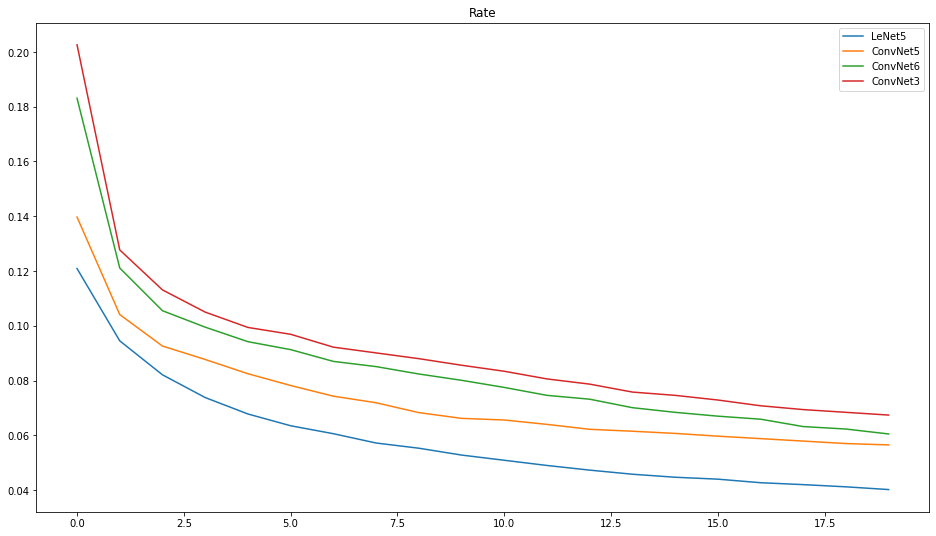

In [143]:
for i in range(len(m_names)):
    plt.plot(m_rates[i], label=m_names[i])
    
plt.legend(loc="upper right")
# plt.ylim(-1.5, 2.0)
plt.title("Rate")
plt.show()

Text(0.5, 1.0, 'Loss')

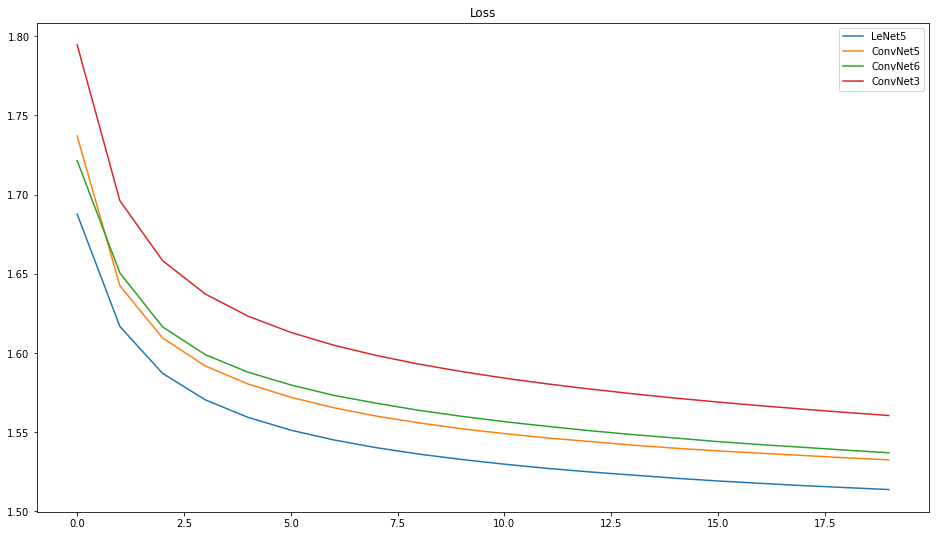

In [145]:
for i in range(len(m_names)):
#     if m_names[i] != 'ConvNet5':
        plt.plot(m_losses[i], label=m_names[i])
    
plt.legend(loc="upper right")
# plt.ylim(-1.5, 2.0)
plt.title("Loss")
plt.show()

In [24]:
class LeNet5_ws(torch.nn.Module):
    def __init__(self):
        super(LeNet5_ws, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1 = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2 = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3 = torch.nn.Tanh()

        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = torch.nn.Tanh()

        self.fc3 = torch.nn.Linear(84, 10)
        self.act5 = torch.nn.Softmax(dim=1)
        
    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        x = self.act5(x)
        
        return x

In [4]:
train_loader_b = torchvision.datasets.FashionMNIST('./', download=True, train=True)
test_loader_b = torchvision.datasets.FashionMNIST('./', download=True, train=False)

In [5]:
X_train_b = train_loader_b.train_data.unsqueeze(1).float()
y_train_b = train_loader_b.train_labels
X_test_b = test_loader_b.test_data.unsqueeze(1).float()
y_test_b = test_loader_b.test_labels

In [128]:
model_b = LeNet5_ws()
rates, losses, test_preds = train_and_test(model_b, X_train_b, y_train_b, X_test_b, y_test_b, n_epochs = 500)

Epoch [1/500], Loss: 1.7995, Error Rate: 0.30
Epoch [2/500], Loss: 1.7497, Error Rate: 0.25
Epoch [3/500], Loss: 1.7255, Error Rate: 0.23
Epoch [4/500], Loss: 1.7116, Error Rate: 0.23
Epoch [5/500], Loss: 1.7014, Error Rate: 0.22
Epoch [6/500], Loss: 1.6938, Error Rate: 0.21
Epoch [7/500], Loss: 1.6876, Error Rate: 0.21
Epoch [8/500], Loss: 1.6828, Error Rate: 0.20
Epoch [9/500], Loss: 1.6792, Error Rate: 0.20
Epoch [10/500], Loss: 1.6765, Error Rate: 0.20
Epoch [11/500], Loss: 1.6733, Error Rate: 0.20
Epoch [12/500], Loss: 1.6710, Error Rate: 0.19
Epoch [13/500], Loss: 1.6692, Error Rate: 0.19
Epoch [14/500], Loss: 1.6679, Error Rate: 0.19
Epoch [15/500], Loss: 1.6660, Error Rate: 0.19
Epoch [16/500], Loss: 1.6646, Error Rate: 0.19
Epoch [17/500], Loss: 1.6634, Error Rate: 0.19
Epoch [18/500], Loss: 1.6625, Error Rate: 0.19
Epoch [19/500], Loss: 1.6612, Error Rate: 0.19
Epoch [20/500], Loss: 1.6603, Error Rate: 0.19
Epoch [21/500], Loss: 1.6595, Error Rate: 0.19
Epoch [22/500], Loss: 

Epoch [174/500], Loss: 1.6249, Error Rate: 0.16
Epoch [175/500], Loss: 1.6244, Error Rate: 0.16
Epoch [176/500], Loss: 1.6240, Error Rate: 0.16
Epoch [177/500], Loss: 1.6235, Error Rate: 0.16
Epoch [178/500], Loss: 1.6232, Error Rate: 0.16
Epoch [179/500], Loss: 1.6226, Error Rate: 0.16
Epoch [180/500], Loss: 1.6222, Error Rate: 0.16
Epoch [181/500], Loss: 1.6218, Error Rate: 0.16
Epoch [182/500], Loss: 1.6214, Error Rate: 0.15
Epoch [183/500], Loss: 1.6210, Error Rate: 0.15
Epoch [184/500], Loss: 1.6206, Error Rate: 0.15
Epoch [185/500], Loss: 1.6202, Error Rate: 0.15
Epoch [186/500], Loss: 1.6199, Error Rate: 0.15
Epoch [187/500], Loss: 1.6196, Error Rate: 0.15
Epoch [188/500], Loss: 1.6191, Error Rate: 0.15
Epoch [189/500], Loss: 1.6188, Error Rate: 0.15
Epoch [190/500], Loss: 1.6184, Error Rate: 0.15
Epoch [191/500], Loss: 1.6181, Error Rate: 0.15
Epoch [192/500], Loss: 1.6177, Error Rate: 0.15
Epoch [193/500], Loss: 1.6174, Error Rate: 0.15
Epoch [194/500], Loss: 1.6171, Error Rat

Epoch [345/500], Loss: 1.5990, Error Rate: 0.13
Epoch [346/500], Loss: 1.5988, Error Rate: 0.13
Epoch [347/500], Loss: 1.5989, Error Rate: 0.13
Epoch [348/500], Loss: 1.5988, Error Rate: 0.13
Epoch [349/500], Loss: 1.5988, Error Rate: 0.13
Epoch [350/500], Loss: 1.5987, Error Rate: 0.13
Epoch [351/500], Loss: 1.5989, Error Rate: 0.13
Epoch [352/500], Loss: 1.5986, Error Rate: 0.13
Epoch [353/500], Loss: 1.5985, Error Rate: 0.13
Epoch [354/500], Loss: 1.5985, Error Rate: 0.13
Epoch [355/500], Loss: 1.5984, Error Rate: 0.13
Epoch [356/500], Loss: 1.5983, Error Rate: 0.13
Epoch [357/500], Loss: 1.5984, Error Rate: 0.13
Epoch [358/500], Loss: 1.5982, Error Rate: 0.13
Epoch [359/500], Loss: 1.5983, Error Rate: 0.13
Epoch [360/500], Loss: 1.5982, Error Rate: 0.13
Epoch [361/500], Loss: 1.5980, Error Rate: 0.13
Epoch [362/500], Loss: 1.5981, Error Rate: 0.13
Epoch [363/500], Loss: 1.5980, Error Rate: 0.13
Epoch [364/500], Loss: 1.5979, Error Rate: 0.13
Epoch [365/500], Loss: 1.5979, Error Rat

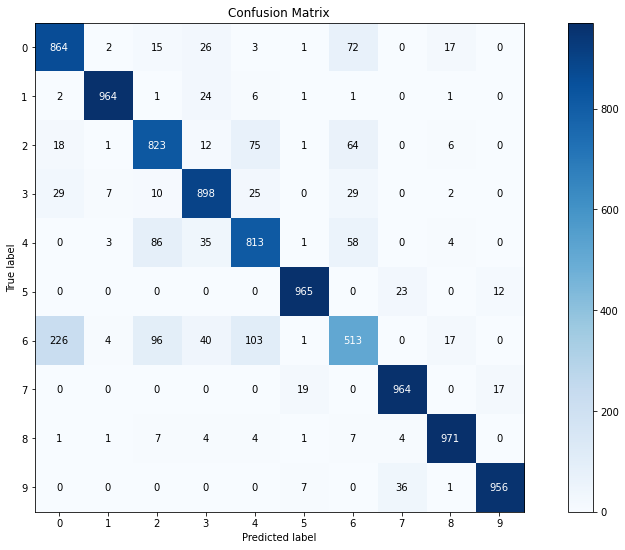

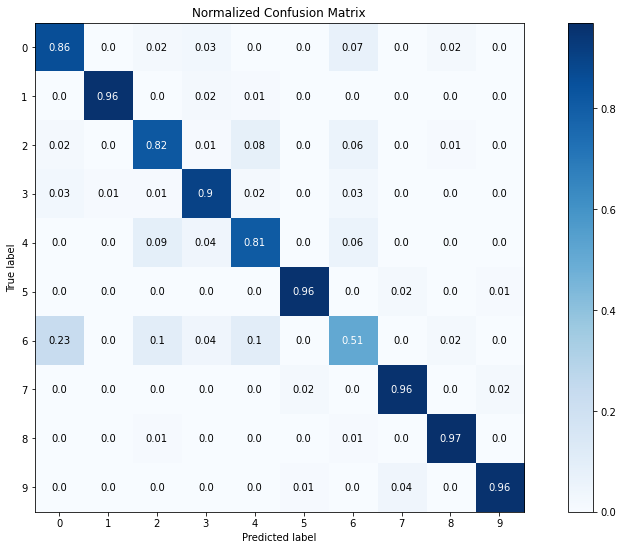

In [134]:
skplt.metrics.plot_confusion_matrix(y_test_b, test_preds.argmax(dim=1), normalize=False)
skplt.metrics.plot_confusion_matrix(y_test_b, test_preds.argmax(dim=1), normalize=True)
plt.show()

In [135]:
def get_confusion(y_test, data):
    max_prob = np.zeros((10, 10))
    max_prob_index = np.zeros((10, 10), dtype=int)
    for i in range(data.shape[0]):
        row = y_test[i]
        for j in range(data.shape[1]):
            if max_prob[row, j] < data[i,j]:
                max_prob[row, j] = data[i, j]
                max_prob_index[row, j] = int(i)
    return max_prob_index

In [136]:
m = get_confusion(y_test_b, test_preds.detach().numpy())

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test_b[5186, 0,:, :])
plt.show()
print(y_train_b[0])

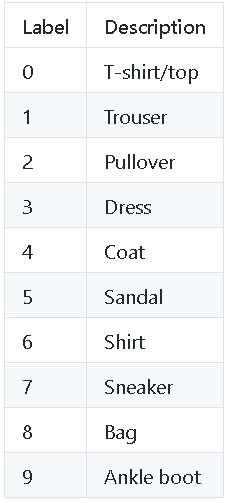

In [138]:
InteractiveShell.ast_node_interactivity = "all" 

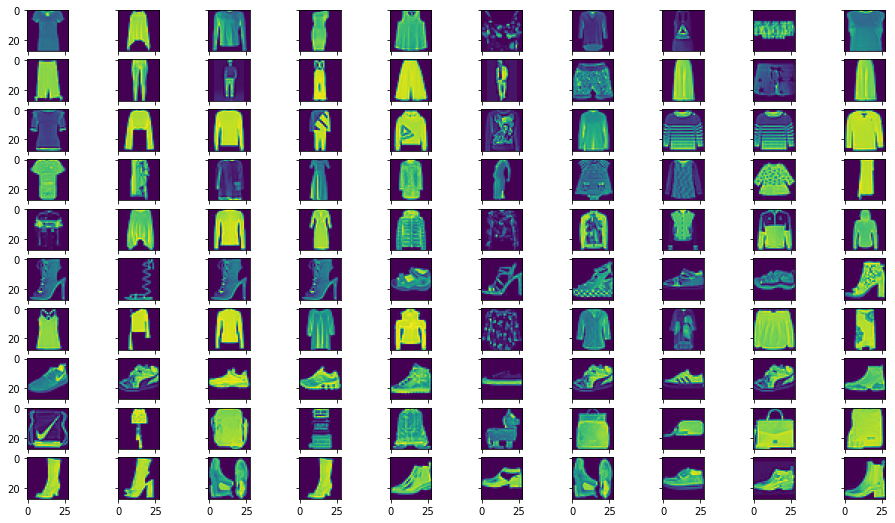

In [137]:
InteractiveShell.ast_node_interactivity = "last_expr"  # ""
fig, axs = plt.subplots(10, 10)
for i in range(10):
    for j in range(10):
        _ = axs[i, j].imshow(X_test_b[m[i][j], 0,:, :])
for ax in axs.flat:
    ax.label_outer()
plt.show()


In [99]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1280x960 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

In [101]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

<Figure size 1332x756 with 0 Axes>

In [132]:
fig.set_size_inches(18.5, 10.5, forward=True)

In [133]:
plt.rcParams["figure.figsize"] = [16,9]